# Exercise 4 - Nils

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

import sklearn.metrics


# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [43]:
def RMSE(y_test, y_predict):
    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
    return RMSE

def plot_predict(y_test, y_predict):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    ax.scatter(y_test, y_predict, alpha = 0.25)
    ax.plot(np.linspace(min(y_test), max(y_test), 2), np.linspace(min(y_test), max(y_test), 2), 'r--')
    ax.set_xlabel('y test', fontsize = 20)
    ax.set_ylabel('y predict', fontsize = 20)
    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '| R - Squared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

def calc_RSquared(y_test, y_predict):
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    SS_res = np.sum((y_test - y_predict)**2)
    return (1 - SS_res/SS_total)

### Exercise 4.1

#### 4.1.1 create model

In [112]:
B0=0
B1=0.5

In [113]:
df = pd.DataFrame()

In [114]:
df['X']=np.random.rand(100)*10

In [115]:
# make help function to create the target

def create_target(x):
    y=B0+B1*np.log(x)+np.random.rand()*0.8
    return y

In [116]:
df['y']=df['X'].map(create_target)

#### 4.1.2 Quadratic model

In [117]:
quad = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [118]:
X = df['X'].reshape(len(df['X']),1)
y = df['y']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
quad.fit(X_train,y_train)
quad.score(X_test,y_test)

0.68713237826336115

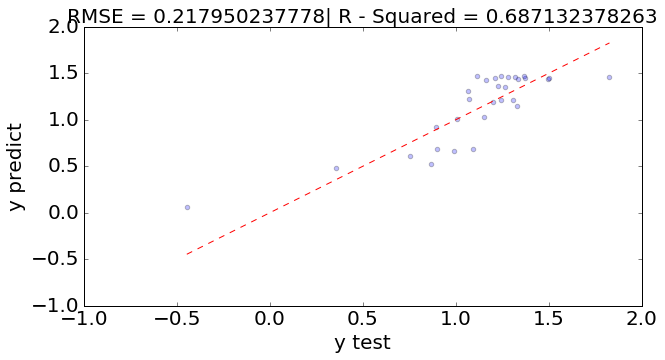

In [120]:
plot_predict(y_test, quad.predict(X_test))

#### 4.1.3. Log model

In [121]:
df['logX']=df['X'].map(lambda x: np.log(x))
log = LinearRegression()

In [122]:
Xlog=df['logX'].reshape(len(df['X']),1)

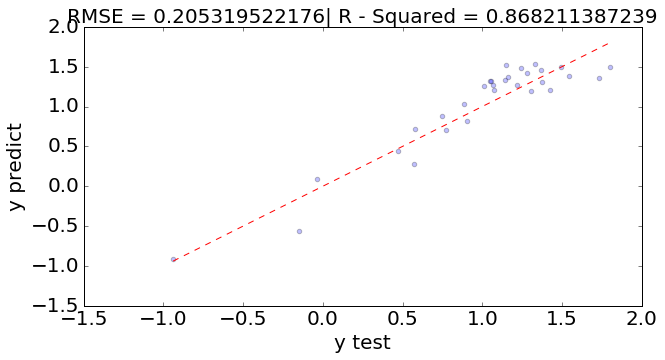

In [123]:
X_train, X_test, y_train, y_test = train_test_split(Xlog, y, test_size=0.3)
log.fit(X_train,y_train)
plot_predict(y_test, log.predict(X_test))

### Exercise 4.2. 

In [130]:
B2 = 2

In [131]:
df2 = pd.DataFrame()

In [132]:
df2['X']=np.random.rand(100)*10

In [133]:
# Function to create y's

def get_target2(x):
    y = B0 + B1*x+B2*x**2+np.random.rand()
    return y

In [134]:
df2['y']=df2['X'].map(get_target2)

In [138]:
X3=df2['X'].reshape(len(df2['X']),1)
y2=df2['y']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X3,y2,test_size=0.3)
quad2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad2.fit(X_train,y_train)
sklearn.metrics.mean_squared_error(y_train,quad2.predict(X_train))

0.070002146987218863

In [157]:
sklearn.metrics.mean_squared_error(y_test,quad2.predict(X_test))

0.084866933182233845

### Exercise 4.3

In [164]:
test_error =[] 
train_error =[]
rsqrd=[]
degrees=range(8)

for degree in degrees:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train,y_train)
    test_error.append(sklearn.metrics.mean_squared_error(y_test,poly.predict(X_test)))
    train_error.append(sklearn.metrics.mean_squared_error(y_train,poly.predict(X_train)))
    rsqrd.append(poly.score(X_train,y_train))

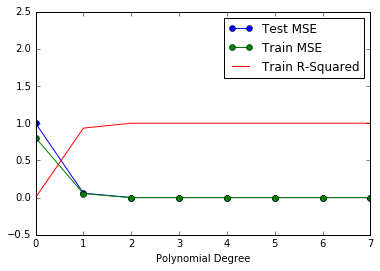

In [194]:
plt.plot(degrees,test_error/test_error[0],'-o', linewidth = 1)
plt.plot(degrees,train_error/test_error[0],'-o',linewidth = 1)
plt.plot(degrees,rsqrd,linewidth = 1)
plt.xlabel('Polynomial Degree')
plt.legend(['Test MSE','Train MSE','Train R-Squared'])
plt.ylim([-0.5,2.5]);

### Exercise 4.4.

In [186]:
test_error2=[]
train_error2=[]

ml = [5,10,15,20,25,30,35,40,45,50,55,60,65,70]

In [187]:
for m in ml:
    poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
    poly2.fit(X_train[:m],y_train[:m])
    test_error2.append(sklearn.metrics.mean_squared_error(y_test,poly2.predict(X_test)))
    train_error2.append(sklearn.metrics.mean_squared_error(y_train,poly2.predict(X_train)))

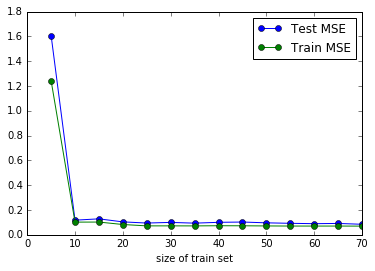

In [192]:
plt.plot(ml,test_error2,'-o',linewidth = 1)
plt.plot(ml,train_error2,'-o',linewidth = 1)
plt.xlabel('size of train set')
plt.legend(['Test MSE','Train MSE','Train R-Squared'])